###  Protein classification using RandomForest

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

%matplotlib inline

In [2]:
df1 = pd.read_csv('Data/pdb_data_no_dups.csv')
df2 = pd.read_csv('Data/pdb_data_seq.csv')

df = pd.merge(df1,df2[['structureId','chainId','sequence']], on='structureId', how='inner')
df.head()

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0,A,CCGGCGCCGG
1,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0,B,CCGGCGCCGG
2,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0,A,CGCGAATTCGCG
3,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0,B,CGCGAATTCGCG
4,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...


In [4]:
print(df.shape)
# Total Protein classes
len(df['classification'].value_counts())

(471149, 16)


4989

In [5]:
# Missing values per column in percentage
for i, v in df.isnull().sum().items():
    print(i, " : ", round((v/471149)*100, 1))

structureId  :  0.0
classification  :  0.0
experimentalTechnique  :  0.0
macromoleculeType  :  7.6
residueCount  :  0.0
resolution  :  4.6
structureMolecularWeight  :  0.0
crystallizationMethod  :  33.2
crystallizationTempK  :  32.6
densityMatthews  :  17.3
densityPercentSol  :  17.3
pdbxDetails  :  18.2
phValue  :  27.7
publicationYear  :  12.2
chainId  :  0.0
sequence  :  0.0


In [178]:
#df.drop(['crystallizationMethod','crystallizationTempK', 'densityMatthews', 'densityPercentSol','phValue','pdbxDetails'], axis=1, inplace=True) 

In [6]:
df.dropna(inplace=True)
print(df.shape)

df.isnull().sum()

(215142, 16)


structureId                 0
classification              0
experimentalTechnique       0
macromoleculeType           0
residueCount                0
resolution                  0
structureMolecularWeight    0
crystallizationMethod       0
crystallizationTempK        0
densityMatthews             0
densityPercentSol           0
pdbxDetails                 0
phValue                     0
publicationYear             0
chainId                     0
sequence                    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215142 entries, 5 to 470659
Data columns (total 16 columns):
structureId                 215142 non-null object
classification              215142 non-null object
experimentalTechnique       215142 non-null object
macromoleculeType           215142 non-null object
residueCount                215142 non-null int64
resolution                  215142 non-null float64
structureMolecularWeight    215142 non-null float64
crystallizationMethod       215142 non-null object
crystallizationTempK        215142 non-null float64
densityMatthews             215142 non-null float64
densityPercentSol           215142 non-null float64
pdbxDetails                 215142 non-null object
phValue                     215142 non-null float64
publicationYear             215142 non-null float64
chainId                     215142 non-null object
sequence                    215142 non-null object
dtypes: float64(7), int64(1), object(8)
memory usage: 27.9+ MB


In [8]:
df.describe()

,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,publicationYear
count,215142.000000,215142.000000,2.151420e+05,215142.000000,215142.000000,215142.000000,215142.000000,215142.000000
mean,4185.896348,2.466985,6.851044e+05,290.958729,2.868666,54.615912,6.823481,2010.861859
std,8649.936406,0.739492,1.546034e+06,8.648016,0.758070,10.077683,1.279748,4.830045
min,5.000000,0.480000,4.885400e+02,4.000000,0.000000,0.000000,0.000000,1985.000000
25%,458.000000,1.950000,5.308898e+04,291.000000,2.330000,47.180000,6.000000,2008.000000
50%,990.000000,2.400000,1.139841e+05,293.000000,2.700000,54.360000,7.000000,2012.000000
75%,2932.000000,2.900000,3.378534e+05,295.000000,3.240000,61.960000,7.500000,2015.000000
max,89160.000000,9.500000,1.249011e+07,398.000000,12.700000,90.330000,100.000000,2018.000000


In [9]:
df = df[df['macromoleculeType'] == "Protein"]
df.reset_index(inplace=True, drop=True)
df.head()

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence
0,1914,ALU DOMAIN,X-RAY DIFFRACTION,Protein,232,2.53,26562.73,hanging drop,277.0,3.00,34.00,THE SRPPHI14-9 PROTEIN WAS CRYSTALLIZED (BIRSE...,7.7,1997.0,A,MASMTGGQQMGRIPGNSPRMVLLESEQFLTELTRLFQKCRSSGSVF...
1,1A04,SIGNAL TRANSDUCTION PROTEIN,X-RAY DIFFRACTION,Protein,430,2.20,47657.25,"VAPOR DIFFUSION, SITTING DROP",277.0,2.49,51.03,THE PROTEIN SOLUTION CONTAINING 23.3 MG/ML OF ...,7.6,1998.0,A,SNQEPATILLIDDHPMLRTGVKQLISMAPDITVVGEASNGEQGIEL...
2,1A04,SIGNAL TRANSDUCTION PROTEIN,X-RAY DIFFRACTION,Protein,430,2.20,47657.25,"VAPOR DIFFUSION, SITTING DROP",277.0,2.49,51.03,THE PROTEIN SOLUTION CONTAINING 23.3 MG/ML OF ...,7.6,1998.0,B,SNQEPATILLIDDHPMLRTGVKQLISMAPDITVVGEASNGEQGIEL...
3,1A0R,COMPLEX (TRANSDUCER/TRANSDUCTION),X-RAY DIFFRACTION,Protein,650,2.80,73467.70,MICROBATCH,277.0,2.25,45.00,THE PROTEIN COMPLEX (10 MG/ML SOLUTION) WAS CR...,6.8,1998.0,B,XSELDQLRQEAEQLKNQIRDARKACADATLSQITNNIDPVGRIQMR...
4,1A0R,COMPLEX (TRANSDUCER/TRANSDUCTION),X-RAY DIFFRACTION,Protein,650,2.80,73467.70,MICROBATCH,277.0,2.25,45.00,THE PROTEIN COMPLEX (10 MG/ML SOLUTION) WAS CR...,6.8,1998.0,G,PVINIEDLTEKDKLKMEVDQLKKEVTLERMLVSKCCEEFRDYVEER...


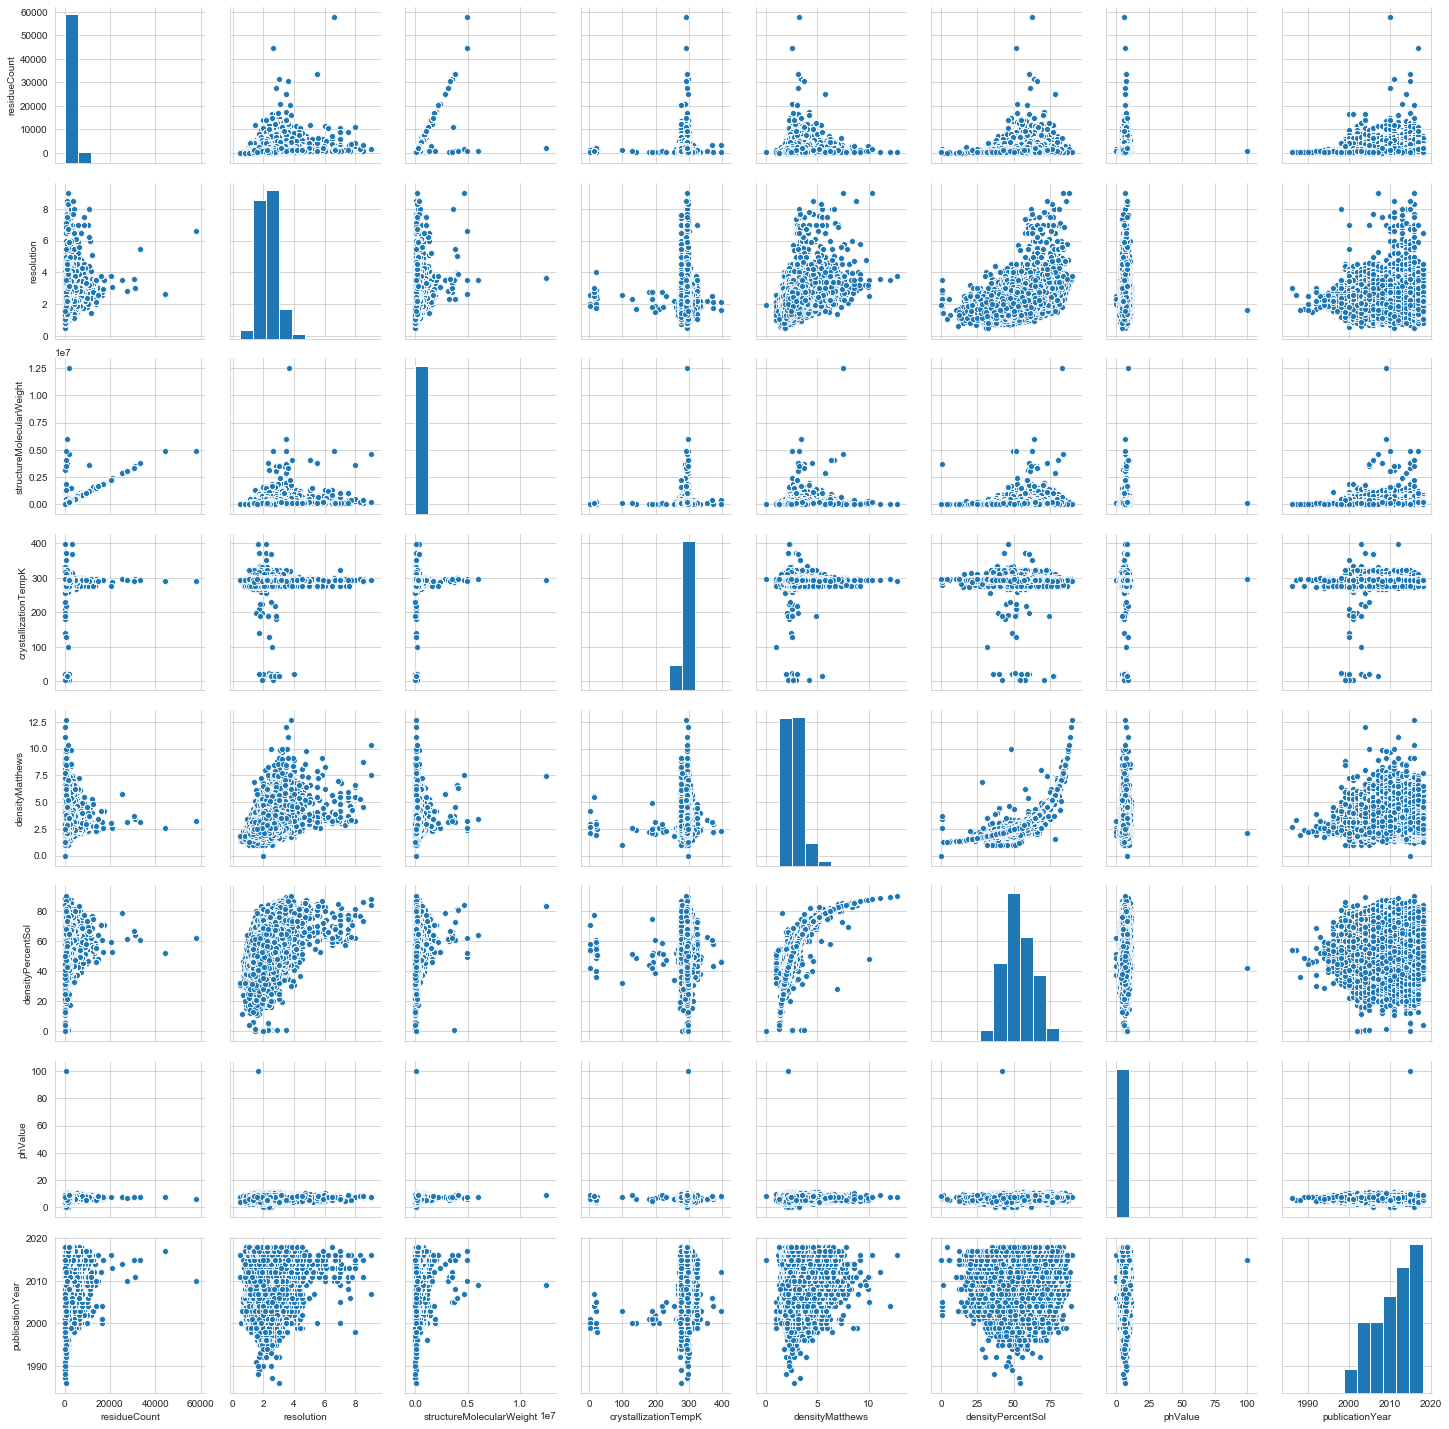

In [9]:
sns.set_style('whitegrid')
sns.pairplot(df)

In [10]:
len(df['classification'].value_counts())

2172

In [11]:
counts = df['classification'].value_counts()

# Filter dataset's records for classification types > 100
types = np.asarray(counts[(counts > 100)].index)

data = df[df.classification.isin(types)]
data.head()

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence
11,1A72,OXIDOREDUCTASE,X-RAY DIFFRACTION,Protein,374,2.6,40658.50,"VAPOR DIFFUSION, HANGING DROP",277.0,2.30,46.82,CRYSTALS GROWN FROM 4 MICROLITER HANGING DROPS...,8.40,1998.0,A,STAGKVIKCKAAVLWEEKKPFSIEEVEVAPPKAHEVRIKMVATGIC...
13,1A8O,VIRAL PROTEIN,X-RAY DIFFRACTION,Protein,70,1.7,8175.72,"VAPOR DIFFUSION, SITTING DROP",277.0,2.21,43.80,CRYSTALS OF CA(151-231) WERE GROWN AT 4C IN 4 ...,8.00,1997.0,A,MDIRQGPKEPFRDYVDRFYKTLRAEQASQEVKNWMTETLLVQNANP...
26,1AR4,OXIDOREDUCTASE,X-RAY DIFFRACTION,Protein,402,1.9,45428.53,microseeding,277.0,2.05,32.00,PROTEIN WAS CRYSTALLIZED AT 50MG/ML FROM 2.15 ...,6.10,1996.0,A,AVYTLPELPYDYSALEPYISGEIMELHHDKHHKAYVDGANTALDKL...
27,1AR4,OXIDOREDUCTASE,X-RAY DIFFRACTION,Protein,402,1.9,45428.53,microseeding,277.0,2.05,32.00,PROTEIN WAS CRYSTALLIZED AT 50MG/ML FROM 2.15 ...,6.10,1996.0,B,AVYTLPELPYDYSALEPYISGEIMELHHDKHHKAYVDGANTALDKL...
28,1AR5,OXIDOREDUCTASE,X-RAY DIFFRACTION,Protein,402,1.6,45430.34,microseeding,277.0,2.04,32.20,PROTEIN WAS CRYSTALLIZED FROM 2.15 M (NH4)2SO4...,6.15,1996.0,A,AVYTLPELPYDYSALEPYISGEIMELHHDKHHKAYVDGANTALDKL...


In [12]:
data.shape

(150801, 16)

In [28]:
class_dict = dict()
count = 1
for i in data['classification'].value_counts().items():
    if i[1] >= 100:
        class_dict[i[0]] = count
        count += 1 

class_dict


{'HYDROLASE': 1,
 'TRANSFERASE': 2,
 'OXIDOREDUCTASE': 3,
 'IMMUNE SYSTEM': 4,
 'HYDROLASE/HYDROLASE INHIBITOR': 5,
 'LYASE': 6,
 'TRANSCRIPTION': 7,
 'TRANSPORT PROTEIN': 8,
 'VIRAL PROTEIN': 9,
 'ISOMERASE': 10,
 'SIGNALING PROTEIN': 11,
 'LIGASE': 12,
 'PROTEIN BINDING': 13,
 'TRANSFERASE/TRANSFERASE INHIBITOR': 14,
 'MEMBRANE PROTEIN': 15,
 'SUGAR BINDING PROTEIN': 16,
 'STRUCTURAL PROTEIN': 17,
 'CHAPERONE': 18,
 'DNA BINDING PROTEIN': 19,
 'METAL BINDING PROTEIN': 20,
 'CELL ADHESION': 21,
 'ELECTRON TRANSPORT': 22,
 'PROTEIN TRANSPORT': 23,
 'UNKNOWN FUNCTION': 24,
 'TOXIN': 25,
 'CELL CYCLE': 26,
 'GENE REGULATION': 27,
 'PHOTOSYNTHESIS': 28,
 'RNA BINDING PROTEIN': 29,
 'OXIDOREDUCTASE/OXIDOREDUCTASE INHIBITOR': 30,
 'DE NOVO PROTEIN': 31,
 'VIRAL PROTEIN/IMMUNE SYSTEM': 32,
 'HORMONE': 33,
 'APOPTOSIS': 34,
 'VIRUS': 35,
 'FLUORESCENT PROTEIN': 36,
 'hydrolase/hydrolase inhibitor': 37,
 'STRUCTURAL GENOMICS, UNKNOWN FUNCTION': 38,
 'BIOSYNTHETIC PROTEIN': 39,
 'METAL TRANSPOR

In [14]:
data['class'] = data['classification'].map(class_dict)
data.head()

C:\Users\sonal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence,class
11,1A72,OXIDOREDUCTASE,X-RAY DIFFRACTION,Protein,374,2.6,40658.50,"VAPOR DIFFUSION, HANGING DROP",277.0,2.30,46.82,CRYSTALS GROWN FROM 4 MICROLITER HANGING DROPS...,8.40,1998.0,A,STAGKVIKCKAAVLWEEKKPFSIEEVEVAPPKAHEVRIKMVATGIC...,3
13,1A8O,VIRAL PROTEIN,X-RAY DIFFRACTION,Protein,70,1.7,8175.72,"VAPOR DIFFUSION, SITTING DROP",277.0,2.21,43.80,CRYSTALS OF CA(151-231) WERE GROWN AT 4C IN 4 ...,8.00,1997.0,A,MDIRQGPKEPFRDYVDRFYKTLRAEQASQEVKNWMTETLLVQNANP...,9
26,1AR4,OXIDOREDUCTASE,X-RAY DIFFRACTION,Protein,402,1.9,45428.53,microseeding,277.0,2.05,32.00,PROTEIN WAS CRYSTALLIZED AT 50MG/ML FROM 2.15 ...,6.10,1996.0,A,AVYTLPELPYDYSALEPYISGEIMELHHDKHHKAYVDGANTALDKL...,3
27,1AR4,OXIDOREDUCTASE,X-RAY DIFFRACTION,Protein,402,1.9,45428.53,microseeding,277.0,2.05,32.00,PROTEIN WAS CRYSTALLIZED AT 50MG/ML FROM 2.15 ...,6.10,1996.0,B,AVYTLPELPYDYSALEPYISGEIMELHHDKHHKAYVDGANTALDKL...,3
28,1AR5,OXIDOREDUCTASE,X-RAY DIFFRACTION,Protein,402,1.6,45430.34,microseeding,277.0,2.04,32.20,PROTEIN WAS CRYSTALLIZED FROM 2.15 M (NH4)2SO4...,6.15,1996.0,A,AVYTLPELPYDYSALEPYISGEIMELHHDKHHKAYVDGANTALDKL...,3


In [17]:
X = data[['residueCount','resolution','structureMolecularWeight','crystallizationTempK','densityMatthews','densityPercentSol','phValue']]
y = data['class']

In [18]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, n_jobs=-1)
m.fit(X_train, y_train)

m.feature_importances_

array([0.2037201 , 0.11172193, 0.20467982, 0.09032749, 0.12414729,
       0.14764798, 0.11775539])

In [19]:
predictions = m.predict(X_test)

# errors = abs(predictions - y_test)
# print("Mean Absolute Error:", round(np.mean(errors), 2))

In [23]:
print(classification_report(y_test, predictions))
print("Accuracy :",accuracy_score(y_test, predictions),'\n')

              precision    recall  f1-score   support

           1       0.73      0.93      0.82      4598
           2       0.79      0.90      0.84      3675
           3       0.91      0.92      0.92      3367
           4       0.88      0.95      0.91      1888
           5       0.96      0.93      0.94      1761
           6       0.95      0.87      0.91      1231
           7       0.86      0.87      0.86       900
           8       0.92      0.82      0.87       804
           9       0.96      0.89      0.93       781
          10       0.94      0.82      0.88       668
          11       0.89      0.77      0.83       614
          12       0.95      0.78      0.85       610
          13       0.90      0.81      0.85       564
          14       0.89      0.73      0.80       477
          15       0.92      0.81      0.86       396
          16       0.94      0.82      0.88       421
          17       0.92      0.74      0.82       345
          18       0.97    

In [24]:
features = ['residueCount','resolution','structureMolecularWeight','crystallizationTempK','densityMatthews','densityPercentSol','phValue']

In [26]:
for f in features:
    df_subs = X.drop(f, axis=1)
    X_train, X_test, y_train, y_test =train_test_split(df_subs, y, test_size=0.2, random_state=42)
    m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, n_jobs=-1)
    m.fit(X_train, y_train)
    predictions = m.predict(X_test)
    print(f, " :",accuracy_score(y_test, predictions),'\n')

residueCount  : 0.8536852226385067 

resolution  : 0.8675110241702861 

structureMolecularWeight  : 0.8517953648751699 

crystallizationTempK  : 0.8602168363117934 

densityMatthews  : 0.8715559828918139 

densityPercentSol  : 0.8710586519014621 

phValue  : 0.8563376545870495 



In [132]:
#pd.set_option('display.max_columns', 100)
#pd.set_option('display.max_rows', 4000)
